# 04. OpenAI API 사용

## 사전 설정

In [2]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [3]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("langchain-kr")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-kr


실제 질의 진행

In [13]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 결정론적 vs. 산발적 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CMZwHym0Y8bLG9CcckEwZg4gnwCub', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--ea14cee5-f272-40f5-80e7-f4fcce0b4232-0' usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


답변의 형식(AI Message)

In [5]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [6]:
response.content

'대한민국의 수도는 서울입니다.'

In [7]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_cbf1785567',
 'id': 'chatcmpl-CMZfon0vO2jEvC66X2HyzqMDZI3Bk',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

### LogProb 활성화

: 주어진 텍스트에 대한 모델의 토큰 확률의 로그 값

In [8]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
).bind(logprobs=True)


In [9]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)


In [10]:
# 결과 출력
response.response_metadata

{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'id': 'chatcmpl-CMZoNWlKBR02O4dWHQOBSVlRJXThr',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.047983073,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -1.6240566e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -3.1281633e-07,
    'top_logprobs': []},
   {'

### 스트리밍 출력

In [11]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [12]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)


대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 해당 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 전서로 186

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 습지**
    - 주소: 전라남도 순천시 순천만길 513-25

이곳들은 각기 다른 매력을 가지고 있어 다양한 경험을 제공할 것입니다. 여행 계획에 참고하시기 바랍니다!

In [14]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)

대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 해당 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주 성산일출봉**
   - 주소: 제주특별자치도 서귀포시 성산읍 성산리 1

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 습지**
    - 주소: 전라남도 순천시 순천만길 513-25

이 관광지들은 각기 다른 매력을 가지고 있어 다양한 경험을 제공합니다. 방문 시 각 지역의 문화와 자연을 즐겨보세요!

### Multimodal (Vision Part)


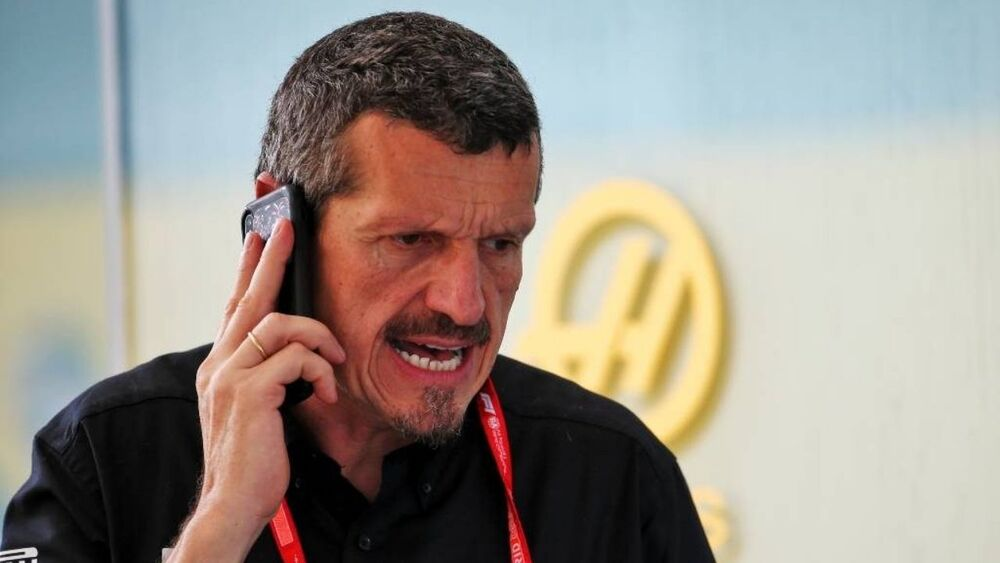

The image shows a man engaged in a phone conversation. He appears to be speaking with intensity or urgency, as suggested by his facial expression and slightly open mouth. He is wearing a black shirt and a red lanyard around his neck. In the background, there is a blurred logo that resembles the letter "H" within a circular design, possibly indicating a specific brand or organization. The setting seems to be indoors, with a light-colored wall behind him.

In [19]:
    from langchain_teddynote.models import MultiModal
    from langchain_teddynote.messages import stream_response

    # 객체 생성
    llm = ChatOpenAI(
        temperature=0.1,  # 창의성 (0.0 ~ 2.0)
        max_tokens=2048,  # 최대 토큰수
        model_name="gpt-4o",  # 모델명
    )

    # 멀티모달 객체 생성
    multimodal_llm = MultiModal(llm)

    # 샘플 이미지 주소(웹사이트로 부터 바로 인식)
    IMAGE_URL = "https://static.wikia.nocookie.net/f1wikia/images/d/d4/Steiner.jpg/revision/latest/scale-to-width-down/1000?cb=20210728112234"

    # 이미지 파일로 부터 질의
    answer = multimodal_llm.stream(IMAGE_URL)
    # 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
    stream_response(answer)


로컬 용


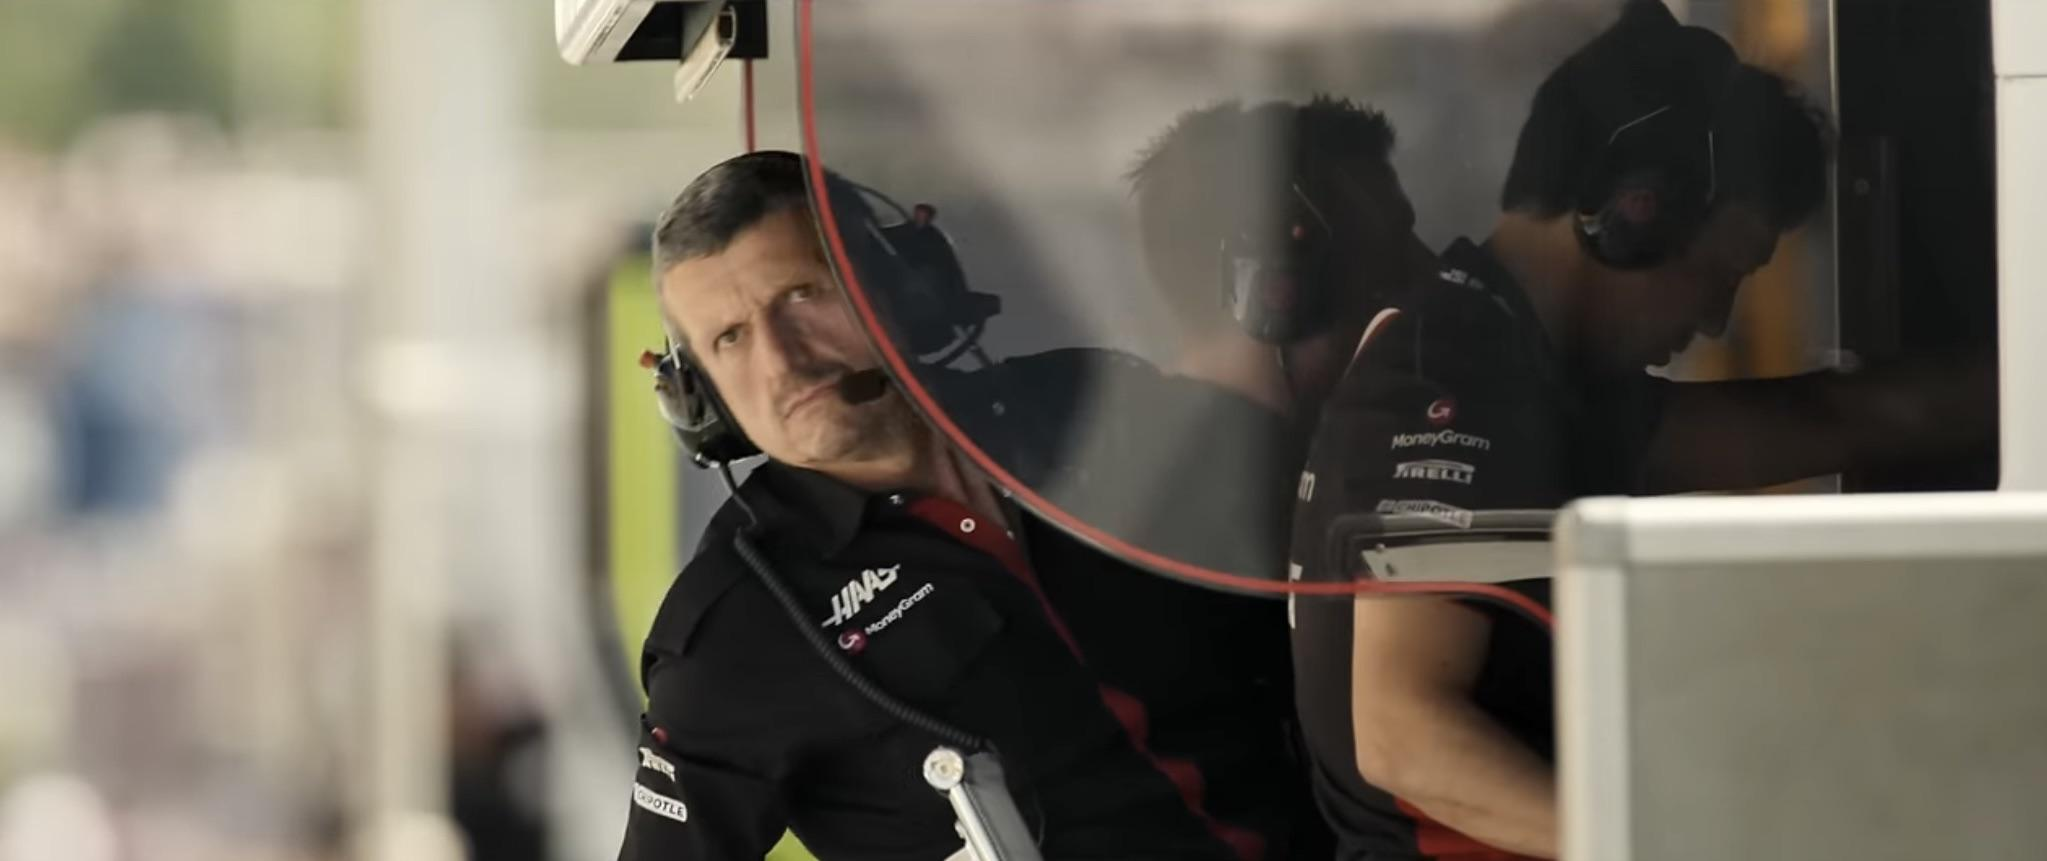

The image shows a person wearing a headset, likely involved in a motorsport event, such as Formula 1. The individual is standing in what appears to be a pit wall or control area, often used by team personnel to monitor and communicate during races. The headset suggests they are in communication with the team or drivers. The shirt has logos, including "Haas" and "MoneyGram," indicating sponsorship or team affiliation. The person is looking intently, possibly focused on the race or a specific task. Another person is partially visible, also wearing a headset, suggesting a collaborative environment.

In [20]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./cs7nqqico3bd1.jpeg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

### System, User 프롬프트 수정

In [21]:
system_prompt = """당신은 Formula 1의 전문 캐스터로서 방대한 기술 지식과 선수와 팀원간의 역사에 대해 꿰고 있는 전문가 입니다.
당신의 의무는 F1 관계자의 사진을 보고 관련 팀 정보와 선수간의 케미, 우승 및 팀 이력등을 분석하고 정리해주는 것입니다."""

user_prompt = """당신에게 주어진 이미지는 F1 직원의 이미지입니다."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


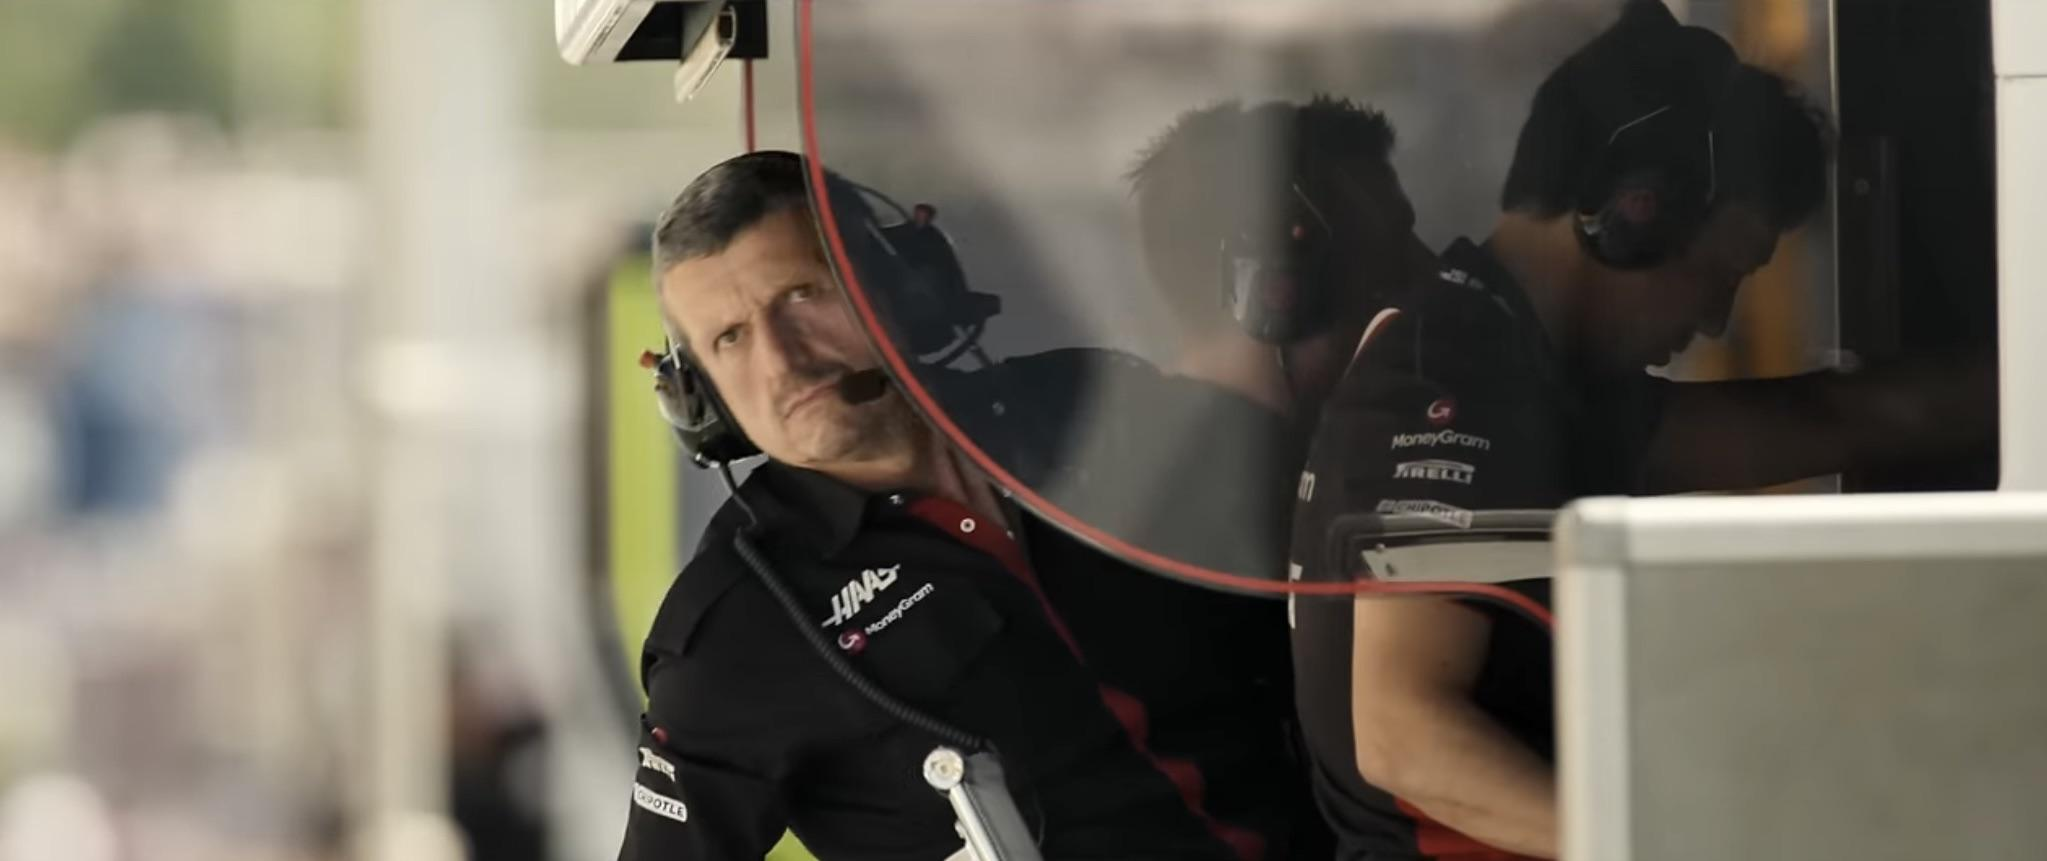

이 이미지는 Haas F1 팀의 피트월에서 일하는 직원의 모습입니다. Haas F1 팀은 2016년에 F1에 데뷔한 미국 기반의 팀으로, 주로 중위권에서 경쟁하고 있습니다. 팀은 강력한 기술 파트너십과 효율적인 운영으로 주목받고 있으며, 드라이버와의 협력도 중요하게 여깁니다. 팀의 목표는 꾸준한 성적 향상과 포인트 획득입니다.

In [23]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://static.wikia.nocookie.net/f1wikia/images/d/d4/Steiner.jpg/revision/latest/scale-to-width-down/1000?cb=20210728112234"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


## 05. LangChain Expression Language(LCEL)

In [24]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()


True

In [25]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("langchain-kr")

LangSmith 추적을 시작합니다.
[프로젝트명]
langchain-kr


### 프롬프트 템플릿의 활용

In [26]:
from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate


from_template() 메소드를 사용하여 PromptTemplate 객체 생성

In [27]:
# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template


PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

In [28]:
# prompt 생성
prompt = prompt_template.format(country="대한민국")
prompt


'대한민국의 수도는 어디인가요?'

In [29]:
# prompt 생성
prompt = prompt_template.format(country="미국")
prompt


'미국의 수도는 어디인가요?'

In [30]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-3.5-turbo",
    max_tokens=2048,
    temperature=0.1,
)


### Chain 생성

In [31]:
# prompt 를 PromptTemplate 객체로 생성합니다.
prompt = PromptTemplate.from_template("{topic} 에 대해 쉽게 설명해주세요.")

model = ChatOpenAI()

chain = prompt | model

In [33]:
input = {"topic": "MoneyGram HAAS F1 Team이 F1의 최강 팀으로 되는 방법"}

In [34]:
# prompt 객체와 model 객체를 파이프(|) 연산자로 연결하고 invoke 메서드를 사용하여 input을 전달합니다.
# 이를 통해 AI 모델이 생성한 메시지를 반환합니다.
chain.invoke(input)

AIMessage(content='HAAS F1 Team이 F1의 최강 팀이 되기 위해서는 몇 가지 중요한 단계를 거쳐야 합니다. \n\n1. 우선적으로, 팀은 우수한 기술력을 갖추고 있는 우수한 엔지니어와 기술진을 고용해야 합니다. 이를 통해 차량의 성능을 극대화하고 경쟁력을 갖출 수 있습니다.\n\n2. 또한, 팀은 승진할 수 있는 협력사 및 제휴사를 발굴하여 기술력을 공유하고 강화해야 합니다. 이를 통해 최신 기술을 도입하고 경쟁력을 향상시킬 수 있습니다.\n\n3. 또한, 팀은 훌륭한 운전수를 영입하여 팀의 시너지를 높여야 합니다. 운전수의 뛰어난 주행 기술과 전략적인 판단력은 팀의 성과를 크게 끌어올릴 수 있습니다.\n\n4. 마지막으로, 팀은 효율적이고 효과적인 전략을 계획하고 실행해야 합니다. 경주 전략, 피트 스톱 전략 등을 최적화하여 경주에서의 경쟁력을 극대화할 수 있습니다.\n\n이러한 단계를 거쳐 HAAS F1 Team은 F1의 최강 팀으로 도약할 수 있을 것입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 430, 'prompt_tokens': 41, 'total_tokens': 471, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMaRQm2UPpgYadxxdgN2yXLEMr5FE', 'service_tier': 'default', 'finish_re

In [35]:
# 스트리밍 출력을 위한 요청
answer = chain.stream(input)
# 스트리밍 출력
stream_response(answer)

머니그램 HAAS F1 Team이 F1의 최강 팀이 되기 위해서는 몇 가지 중요한 요소들이 필요합니다. 

먼저, 탁월한 운전수를 발굴하고 육성해야 합니다. 운전수는 경주에서 팀의 성과를 좌우하는 가장 중요한 역할을 맡고 있기 때문에 뛰어난 실력과 경험이 필요합니다.

또한, 기술적으로 우수한 차량을 개발해야 합니다. F1 경주에서는 차량의 성능이 매우 중요하며, 높은 기술력과 정밀한 조립이 필요합니다. 따라서 엔지니어링 팀은 차량의 성능을 꾸준히 향상시키는데 주력해야 합니다.

마지막으로, 팀 내부의 조직과 커뮤니케이션을 늘려 나가야 합니다. 성공적인 팀워크와 협업은 팀의 성과를 크게 끌어올릴 수 있으며, 각 구성원들 간의 소통과 협력이 중요합니다.

이러한 요소들을 고려하고 적절히 발전시키면 MoneyGram HAAS F1 Team이 F1의 최강 팀으로 성장할 수 있을 것입니다.

### 출력 파서 (Output Parser)

In [36]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
# chain 객체의 invoke 메서드를 사용하여 input을 전달합니다.
input = {"topic": "MoneyGram HAAS F1 Team이 F1의 최강 팀으로 되는 방법"}
chain.invoke(input)


AIMessage(content='MoneyGram HAAS F1 Team이 F1의 최강 팀이 되기 위해서는 다음과 같은 절차를 거쳐야 합니다.\n\n1. 우수한 운영팀 구성: F1은 팀 운영이 매우 중요한 요소입니다. MoneyGram HAAS F1 Team은 우수한 운영팀을 구성하여 차량 및 경주 전략을 최적화해야 합니다.\n\n2. 기술력 강화: F1에서 승리를 거두기 위해서는 차량의 기술력이 매우 중요합니다. MoneyGram HAAS F1 Team은 최신 기술을 활용하여 차량의 성능을 끌어올려야 합니다.\n\n3. 우수한 운전수 영입: F1에서는 운전수의 능력이 매우 중요합니다. MoneyGram HAAS F1 Team은 우수한 운전수를 영입하여 팀의 성과를 높여야 합니다.\n\n4. 지속적인 투자 및 개발: F1은 매우 경쟁이 치열한 스포츠입니다. MoneyGram HAAS F1 Team은 지속적으로 투자하고 연구 및 개발을 진행하여 팀의 경쟁력을 높여야 합니다.\n\n이러한 요소들을 고려하여 MoneyGram HAAS F1 Team이 F1의 최강 팀이 될 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 398, 'prompt_tokens': 41, 'total_tokens': 439, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMaTP5VKPBwszmH

In [37]:
# 스트리밍 출력을 위한 요청
answer = chain.stream(input)
# 스트리밍 출력
stream_response(answer)


MoneyGram HAAS F1 Team이 F1의 최강 팀이 되기 위해서는 몇 가지 중요한 요소가 있습니다. 

1. 우수한 기술력: 새로운 기술과 혁신적인 아이디어를 팀에 도입하여 차량의 성능을 끌어 올리는 것이 중요합니다. 엔지니어링 팀과 기술진이 함께 협력하여 혁신적인 기술을 개발해 나가야 합니다.

2. 우수한 운전수: 팀의 운전수는 탁월한 실력과 뛰어난 주행 능력을 갖추어야 합니다. 팀의 운전수가 전략적으로 경주를 펼치고 레이스에서 우수한 성적을 낼 수 있도록 해야 합니다.

3. 강력한 후원사 및 자금: F1은 매우 비용이 많이 드는 스포츠로, 팀의 운영에 필요한 자금이 중요합니다. MoneyGram과 같은 대형 후원사를 유치하여 자금을 확보하고, 팀의 운영에 필요한 모든 비용을 충당할 수 있어야 합니다.

4. 팀 내 협력과 소통: 팀의 구성원들 간의 협력과 소통이 원활하게 이루어져야 합니다. 팀원들 간의 협업과 소통이 원활하다면, 팀은 빠르게 성장하고 발전할 수 있습니다.

이러한 요소들을 충분히 고려하고, MoneyGram HAAS F1 Team은 F1의 최강 팀으로 성장할 수 있습니다.

### 템플릿을 변경하여 적용

In [38]:
template = """
당신은 야생동물학박사입니다. 상황에 맞게 [FORMAT]에 동물의 정보를 작성해 주세요.

상황:
{question}

FORMAT:
- 동물 이름:
- 동물 종류:
- 동물 특징
"""

# 프롬프트 템플릿을 이용하여 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(template)

# ChatOpenAI 챗모델을 초기화합니다.
model = ChatOpenAI(model_name="gpt-4-turbo")

# 문자열 출력 파서를 초기화합니다.
output_parser = StrOutputParser()


In [39]:
# 체인을 구성합니다.
chain = prompt | model | output_parser


In [43]:
# 완성된 Chain을 실행하여 답변을 얻습니다.
# 스트리밍 출력을 위한 요청
answer = chain.stream({"question": "지렁이"})
# 스트리밍 출력
stream_response(answer)


- 동물 이름: 지렁이
- 동물 종류: 무척추동물
- 동물 특징: 지렁이는 대부분의 종류가 흙 속에서 생활하는 세그먼트가 있는 원통형의 몸을 가진 무척추동물입니다. 그들은 토양을 개량하고 유기물을 분해하는 중요한 역할을 합니다. 지렁이의 몸은 여러 개의 링 모양의 부분으로 나뉘어져 있으며, 각 세그먼트는 근육, 혈관, 신경과 같은 구조를 포함하고 있습니다. 지렁이는 몸 전체로 호흡을 하며, 빛과 진동에 매우 민감합니다. 번식 방법은 대부분 자웅동체로, 한 개체가 남성과 여성의 생식기관을 모두 가지고 있어서 상호 수정을 통해 알을 낳습니다.

In [44]:
# 이번에는 question 을 '미국에서 피자 주문'으로 설정하여 실행합니다.
# 스트리밍 출력을 위한 요청
answer = chain.stream({"question": "해로운 지렁이 종류"})
# 스트리밍 출력
stream_response(answer)


- 동물 이름: 일본잔뿌리선충 (Bursaphelenchus xylophilus)
- 동물 종류: 선충류
- 동물 특징: 일본잔뿌리선충은 이른바 소나무재선충병을 일으키는 유해 선충입니다. 주로 소나무와 같은 침엽수 목재를 공격하여 나무가 급속도로 말라 죽게 만듭니다. 이 선충은 소나무류에 치명적이며, 특히 아시아와 유럽의 소나무 숲에서 큰 피해를 줍니다. 다른 곤충, 특히 소나무를 공격하는 풍뎅이류와의 상호작용을 통해 전파되기도 합니다. 이 선충으로 인한 질병이 발생하면 효과적인 치료법이 매우 제한적이어서 큰 경제적 손실을 초래할 수 있습니다.

## 06. LCEL : LangChain Expression **Language(LCEL)**

In [46]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# ChatOpenAI 모델을 인스턴스화합니다.
model = ChatOpenAI()
# 주어진 토픽에 대한 농담을 요청하는 프롬프트 템플릿을 생성합니다.
prompt = PromptTemplate.from_template("{topic} 에 대하여 3문장으로 설명해줘.")
# 프롬프트와 모델을 연결하여 대화 체인을 생성합니다.
chain = prompt | model | StrOutputParser()


### stream: 실시간 출력

In [49]:
# chain.stream 메서드를 사용하여 '멀티모달' 토픽에 대한 스트림을 생성하고 반복합니다.
for token in chain.stream({"topic": "멀티모달"}):
    # 스트림에서 받은 데이터의 내용을 출력합니다. 줄바꿈 없이 이어서 출력하고, 버퍼를 즉시 비웁니다.
    print(token, end="", flush=True)

멀티모달은 여러 가지 다른 수단이나 매체를 이용해 정보를 전달하거나 상호작용하는 것을 말합니다. 이는 텍스트, 음성, 이미지, 동영상 등 다양한 형식으로 사용자와 소통하는 것을 의미합니다. 멀티모달은 사용자 경험을 향상시키고 정보 전달의 효율성을 높일 수 있는 강력한 도구로 활용됩니다.

### invoke: 호출

In [51]:
# chain 객체의 invoke 메서드를 호출하고, 'ChatGPT'라는 주제로 딕셔너리를 전달합니다.
chain.invoke({"topic": "멀티모달"})

'멀티모달이란 두 가지 이상의 다른 형태나 매체로 정보를 전달하는 방식을 말합니다. 이는 텍스트, 이미지, 오디오, 비디오 등을 동시에 활용하여 더 풍부하고 다양한 경험을 제공합니다. 멀티모달은 사용자들에게 보다 효과적인 정보 전달과 이해를 도와줄 수 있습니다.'

### batch: 배치(단위 실행)

In [52]:
# 주어진 토픽 리스트를 batch 처리하는 함수 호출
chain.batch([{"topic": "ChatGPT"}, {"topic": "Instagram"}])

['ChatGPT는 인공지능 챗봇으로, 사용자와 자연스럽게 대화를 나눌 수 있다. 감정 분석, 지식 전달, 업무 지원 등 다양한 기능을 제공한다. 사용자의 질문에 빠르고 정확하게 대답하여 소통을 원활하게 도와준다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼이며, 사용자들은 다양한 필터와 효과를 사용하여 자신의 콘텐츠를 꾸밀 수 있습니다. 또한 다른 사용자들의 게시물을 보고 좋아요나 댓글을 남기는 등 상호 소통이 가능합니다.Instagram은 시각적 콘텐츠를 중심으로 한 소셜 미디어 플랫폼으로 세계적인 인기를 누리고 있습니다.']

config 딕셔너리는 max_concurrency 키를 통해 동시에 처리할 수 있는 최대 작업 수를 설정합니다.

여기서는 최대 3개의 작업을 동시에 처리하도록 설정되어 있습니다.

In [58]:
chain.batch(
    [
        {"topic": "ChatGPT"},
        {"topic": "Instagram"},
        {"topic": "멀티모달"},
        {"topic": "프로그래밍"},
        {"topic": "머신러닝"},
    ],
    config={"max_concurrency": 3},
)


['ChatGPT는 AI 기술을 활용하여 자연어로 대화를 나눌 수 있는 챗봇 서비스입니다. 사용자의 질문에 빠르고 정확하게 응답하며, 다양한 주제에 대해 대화를 이어나갈 수 있습니다. 계속 발전하는 인공지능 기술을 활용하여 사용자들과 자연스럽게 소통할 수 있는 서비스로 인기를 끌고 있습니다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼이다.\n사용자는 팔로워들과 소통하며 일상을 공유하고 콘텐츠를 업로드할 수 있다.\n해시태그를 이용하여 관심 주제를 검색하고 다양한 사용자들과 소통할 수 있다.',
 '멀티모달은 다양한 형태의 정보를 조합하여 제공하는 시스템이다. 이는 텍스트, 음성, 이미지, 동영상 등 다양한 매체를 활용하여 사용자에게 정보를 전달하고 상호작용하는 시스템을 말한다. 멀티모달은 사용자 경험을 향상시키고 정보 전달의 효율성을 높여준다.',
 '프로그래밍은 컴퓨터에 명령을 내리고 작업을 수행할 수 있도록 코드를 작성하는 과정이다. 이를 통해 다양한 소프트웨어나 애플리케이션을 개발하고 문제를 해결할 수 있다. 프로그래밍 언어에는 다양한 종류가 있으며, 각각의 언어는 특징과 용도에 따라 다양하게 활용된다.',
 '머신러닝은 컴퓨터가 데이터를 학습하고 패턴을 인식하여 예측하도록 하는 인공지능 기술이다.\n\n머신러닝은 데이터를 기반으로 모델을 학습시켜 문제를 해결하고, 새로운 데이터에 대한 예측을 수행한다.\n\n머신러닝은 이미지 인식, 자연어 처리, 음성 인식 등 다양한 분야에서 활용되며, 인간의 학습과 의사결정 능력을 모방하는데 사용된다.']

### async stream: 비동기 스트림

In [61]:
# 비동기 스트림을 사용하여 'YouTube' 토픽의 메시지를 처리합니다.
async for token in chain.astream({"topic": "YouTube"}):
    # 메시지 내용을 출력합니다. 줄바꿈 없이 바로 출력하고 버퍼를 비웁니다.
    print(token, end="", flush=True)


YouTube는 전 세계에서 가장 인기 있는 비디오 공유 플랫폼으로, 다양한 콘텐츠를 시청할 수 있고 자신의 콘텐츠를 업로드할 수도 있다. 유저들은 구독하여 새로운 동영상을 받아볼 수 있으며, 댓글을 통해 소통과 의견을 나눌 수 있다. 광고 수익을 얻을 수 있는 YouTube 파트너십 프로그램을 통해 유튜버들은 수익을 창출할 수도 있다.

### async invoke: 비동기 호출

In [63]:
# 비동기 체인 객체의 'ainvoke' 메서드를 호출하여 'NVDA' 토픽을 처리합니다.
my_process = chain.ainvoke({"topic": "NVDA"})


In [64]:
# 비동기로 처리되는 프로세스가 완료될 때까지 기다립니다.
await my_process

'NVDA는 미국의 인공지능 기술 기업으로, 주로 컴퓨터 화면을 음성으로 읽어주는 스크린리더 소프트웨어를 개발하고 있다. 많은 시각 장애인 및 시각 장애가 있는 사람들에게 컴퓨터 사용의 기회를 제공하고 있다. 현재 전 세계적으로 많은 사용자들이 NVDA를 활용하고 있으며, 무료로 제공되는 소프트웨어로 높은 평가를 받고 있다.'

### async batch: 비동기 배치

In [66]:
# 주어진 토픽에 대해 비동기적으로 일괄 처리를 수행합니다.
my_abatch_process = chain.abatch(
    [{"topic": "YouTube"}, {"topic": "Instagram"}, {"topic": "Facebook"}]
)


In [67]:
# 비동기로 처리되는 일괄 처리 프로세스가 완료될 때까지 기다립니다.
await my_abatch_process


['YouTube는 Google이 소유하고 운영하는 동영상 공유 플랫폼으로, 사용자들이 영상을 업로드하고 시청할 수 있는 서비스이다. 다양한 주제의 동영상 콘텐츠를 제공하며, 유명한 크리에이터들이 활동하는 공간으로 유명하다. 또한 광고 수익을 얻을 수 있는 파트너 프로그램을 운영하여 크리에이터들이 수익을 창출할 수 있도록 지원하고 있다.',
 '인스타그램은 사진과 동영상을 공유하고 다른 사람들의 콘텐츠를 감상할 수 있는 소셜 미디어 플랫폼이다. \n해시태그를 통해 관심사에 맞는 게시물을 찾을 수 있고 팔로우를 통해 관심 있는 사용자의 활동을 쉽게 따라갈 수 있다.\n인기 있는 인플루언서와 브랜드들도 활발히 활동하며 광고와 협찬도 이루어지고 있다.',
 'Facebook은 사회관계망 서비스로, 사용자들이 친구들과 소통하고 콘텐츠를 공유할 수 있는 플랫폼이다. 전 세계적으로 많은 사용자들이 활발하게 이용하며, 광고 및 비지니스 활동에도 활발히 활용되고 있다. 개인정보 보호 이슈로 논란을 빚어왔으나, 여전히 많은 사람들에게 인기 있는 SNS 서비스이다.']

### Parallel: 병렬성

In [68]:
from langchain_core.runnables import RunnableParallel

# {country} 의 수도를 물어보는 체인을 생성합니다.
chain1 = (
    PromptTemplate.from_template("{country} 의 수도는 어디야?")
    | model
    | StrOutputParser()
)

# {country} 의 면적을 물어보는 체인을 생성합니다.
chain2 = (
    PromptTemplate.from_template("{country} 의 면적은 얼마야?")
    | model
    | StrOutputParser()
)

# 위의 2개 체인을 동시에 생성하는 병렬 실행 체인을 생성합니다.
combined = RunnableParallel(capital=chain1, area=chain2)


In [69]:
# chain1 를 실행합니다.
chain1.invoke({"country": "대한민국"})

'대한민국의 수도는 서울이다.'

In [70]:
# chain2 를 실행합니다.
chain2.invoke({"country": "미국"})


'미국의 면적은 약 9,826만 제곱킬로미터 입니다.'

In [71]:
# 병렬 실행 체인을 실행합니다.
combined.invoke({"country": "대한민국"})

{'capital': '대한민국의 수도는 서울이야.', 'area': '대한민국의 면적은 약 100,363 제곱 킬로미터 입니다.'}

### 배치에서의 병렬 처리

In [72]:
# 배치 처리를 수행합니다.
chain1.batch([{"country": "대한민국"}, {"country": "미국"}])


['대한민국의 수도는 서울이다.', '미국의 수도는 워싱턴 D.C.입니다.']

In [73]:
# 배치 처리를 수행합니다.
chain2.batch([{"country": "대한민국"}, {"country": "미국"}])


['대한민국의 면적은 약 100,363 제곱 킬로미터이다.',
 '미국의 면적은 9,826,675 km² (약 3,796,742 평방 마일)이다.']

In [74]:
# 주어진 데이터를 배치로 처리합니다.
combined.batch([{"country": "대한민국"}, {"country": "미국"}])


[{'capital': '서울이야.', 'area': '대한민국의 총 면적은 약 100,364 제곱 킬로미터입니다.'},
 {'capital': '미국의 수도는 워싱턴 D.C.입니다.',
  'area': '미국은 약 9.8백만 제곱 킬로미터의 면적을 가지고 있습니다.'}]

## 07. Runnable

### RunnablePassthrough

In [75]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI


# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template("{num}번째 피보나치 수열 값은?")
llm = ChatOpenAI(temperature=0)

# chain 을 생성합니다.
chain = prompt | llm


In [76]:
# chain 을 실행합니다.
chain.invoke({"num": 5})


AIMessage(content='5번째 피보나치 수열 값은 3입니다. \n\n피보나치 수열은 이전 두 항을 더한 값을 다음 항으로 하는 수열로, 0, 1, 1, 2, 3, 5, 8, 13, ... 와 같이 시작합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 21, 'total_tokens': 103, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMaqPOz0qQYfcIRwf6HCseTGBYYTF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d5ed3397-bdd2-4bb8-b9ab-dfab01d942b5-0', usage_metadata={'input_tokens': 21, 'output_tokens': 82, 'total_tokens': 103, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [77]:
# chain 을 실행합니다.
chain.invoke(5)


AIMessage(content='5번째 피보나치 수열 값은 3입니다. \n\n피보나치 수열은 이전 두 항을 더한 값을 다음 항으로 하는 수열로, 0, 1, 1, 2, 3, 5, 8, 13, ...과 같이 시작합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 21, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMarC44AkdqfQ62GspJ8Ri0JOxJru', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d428c321-6b01-4821-9fd0-724116a08c1f-0', usage_metadata={'input_tokens': 21, 'output_tokens': 81, 'total_tokens': 102, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [78]:
from langchain_core.runnables import RunnablePassthrough

# runnable
RunnablePassthrough().invoke({"num": 10})


{'num': 10}

RunnablePassthrough 로 체인을 구성하는 예제

In [79]:
runnable_chain = {"num": RunnablePassthrough()} | prompt | ChatOpenAI()

# dict 값이 RunnablePassthrough() 로 변경되었습니다.
runnable_chain.invoke(10)


AIMessage(content='55입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 21, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMaru4PEtjh0ZCOw48KLMX0jRH6Cp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a1f35620-0344-4c9b-b5de-e88dfc069cbd-0', usage_metadata={'input_tokens': 21, 'output_tokens': 3, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [80]:
RunnablePassthrough().invoke({"num": 1})


{'num': 1}

RunnablePassthrough.assign()

입력 값으로 들어온 값의 key/value 쌍과 새롭게 할당된 key/value 쌍을 합칩니다.

In [81]:
# 입력 키: num, 할당(assign) 키: new_num
(RunnablePassthrough.assign(new_num=lambda x: x["num"] * 3)).invoke({"num": 1})


{'num': 1, 'new_num': 3}

### RunnableParallel

In [82]:
from langchain_core.runnables import RunnableParallel

# RunnableParallel 인스턴스를 생성합니다. 이 인스턴스는 여러 Runnable 인스턴스를 병렬로 실행할 수 있습니다.
runnable = RunnableParallel(
    # RunnablePassthrough 인스턴스를 'passed' 키워드 인자로 전달합니다. 이는 입력된 데이터를 그대로 통과시키는 역할을 합니다.
    passed=RunnablePassthrough(),
    # 'extra' 키워드 인자로 RunnablePassthrough.assign을 사용하여, 'mult' 람다 함수를 할당합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값을 3배로 증가시킵니다.
    extra=RunnablePassthrough.assign(mult=lambda x: x["num"] * 3),
    # 'modified' 키워드 인자로 람다 함수를 전달합니다. 이 함수는 입력된 딕셔너리의 'num' 키에 해당하는 값에 1을 더합니다.
    modified=lambda x: x["num"] + 1,
)

# runnable 인스턴스에 {'num': 1} 딕셔너리를 입력으로 전달하여 invoke 메소드를 호출합니다.
runnable.invoke({"num": 1})


{'passed': {'num': 1}, 'extra': {'num': 1, 'mult': 3}, 'modified': 2}

In [83]:
chain1 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 수도는?")
    | ChatOpenAI()
)
chain2 = (
    {"country": RunnablePassthrough()}
    | PromptTemplate.from_template("{country} 의 면적은?")
    | ChatOpenAI()
)


In [84]:
combined_chain = RunnableParallel(capital=chain1, area=chain2)
combined_chain.invoke("대한민국")


{'capital': AIMessage(content='서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 19, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMathPo3o3HSxMS1wdPJh7E4x1CKa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8e9e8fc9-c2a5-47fb-b415-441dd6c538fa-0', usage_metadata={'input_tokens': 19, 'output_tokens': 5, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'area': AIMessage(content='대한민국의 면적은 약 100,363 제곱 킬로미터 입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 20, 'total_tokens': 4

### RunnableLambda

In [85]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from datetime import datetime


def get_today(a):
    # 오늘 날짜를 가져오기
    return datetime.today().strftime("%b-%d")


# 오늘 날짜를 출력
get_today(None)


'Oct-03'

In [86]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

# prompt 와 llm 을 생성합니다.
prompt = PromptTemplate.from_template(
    "{today} 가 생일인 유명인 {n} 명을 나열하세요. 생년월일을 표기해 주세요."
)
llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

# chain 을 생성합니다.
chain = (
    {"today": RunnableLambda(get_today), "n": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)


In [87]:
# 출력
print(chain.invoke(3))


10월 3일이 생일인 유명인 세 명은 다음과 같습니다:

1. **구웬 스테파니 (Gwen Stefani)** - 1969년 10월 3일
2. **클라이브 오웬 (Clive Owen)** - 1964년 10월 3일
3. **레나 헤디 (Lena Headey)** - 1973년 10월 3일

이들은 각각 음악, 영화, 텔레비전 등 다양한 분야에서 활동하고 있는 유명인들입니다.


itemgetter 를 사용하여 특정 키를 추출합니다.

In [89]:
from operator import itemgetter

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI


# 문장의 길이를 반환하는 함수입니다.
def length_function(text):
    return len(text)


# 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def _multiple_length_function(text1, text2):
    return len(text1) * len(text2)


# _multiple_length_function 함수를 사용하여 두 문장의 길이를 곱한 값을 반환하는 함수입니다.
def multiple_length_function(_dict):
    return _multiple_length_function(_dict["text1"], _dict["text2"])


prompt = ChatPromptTemplate.from_template("{a} + {b} 는 무엇인가요?")
model = ChatOpenAI()

chain1 = prompt | model

chain = (
    {
        "a": itemgetter("word1") | RunnableLambda(length_function),
        "b": {"text1": itemgetter("word1"), "text2": itemgetter("word2")}
        | RunnableLambda(multiple_length_function),
    }
    | prompt
    | model
)


In [90]:
chain.invoke({"word1": "hello", "word2": "world"})


AIMessage(content='5 + 25 = 30입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 22, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CMawthAAbmfOITRD7TXT6nAXQIn9o', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e256ae10-1aba-4c7e-8948-6ae70b5375fb-0', usage_metadata={'input_tokens': 22, 'output_tokens': 9, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})